# Additional Material on Evolutionary Computation

1. You can read [Crawford 1992 - Solving the n-Queens Problem Using Genetic Algorithms](./Crawford1992.pdf) and compare the suggested solution approach to the one we will implement here. 
2. Watch: [A primer Introduction to Evolutionary Computing and Genetic Algorithms](https://www.youtube.com/watch?v=9zfeTw-uFCw&list=PLRqwX-V7Uu6bJM3VgzjNV5YxVxUwzALHV) 

## 2. Solving the 8-Queens Problem with Genetic Algorithms 

The n-Queens problem: place $n$ queens on a chess board so that no queen attacks another. A queen attacks any piece in the same row, column, or diagonal.

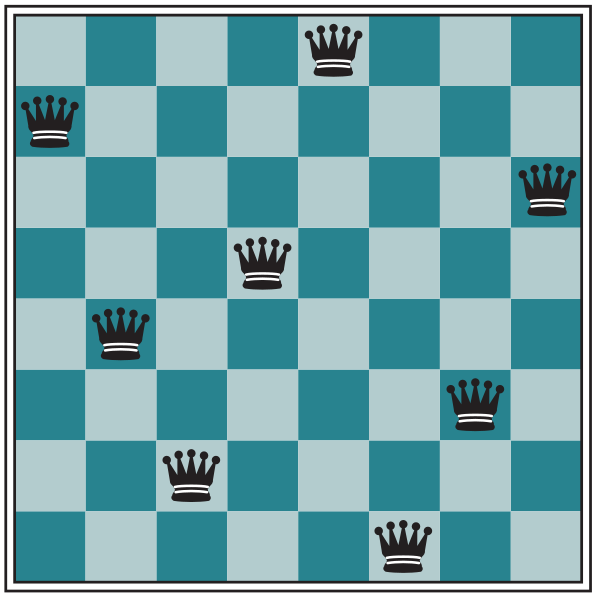

Let us fokus on $n=8$, i.e. the 8-queens problem first and then extend this problem to significantly larger $n$.

## Genotypes 

For the n-Queens game, a genotype, or chromosome, is a permutation of the numbers $1,\ldots,8$, and a given $g=\langle i_1,\ldots,i_8\rangle$ denotes the unique board configuration, where the $n\text{th}$ column contains exactly one queen placed on the $i_n\text{th}$ row. For instance, the permutation $g=\langle 1,\ldots, 8\rangle$ represents a board where the queens are placed along the main diagonal. The genotype space $G$ is now the set of all permuations of $1,\ldots,8$ and we also have defined a mapping $F:G\to P$, where $P$ is our phenotype space (the board configurations of our queens).

It is easy to see that by using such chromosomes we restrict the search to board configurations where horizontal constraint violations (two queens on the same row) and vertical constraint violations (two queens on the same column) do not occur. This representation guarantees half of the requirements of a solution - what remains to be minimized is the number of diagonal constraint violations. 

<font color='red'>(Q1) By using this representation of genotypes, is there a danger of missing solutions in $P$?
Are there solutions in $P \setminus F(G)$? Explain your reasoning.</font>

In [ ]:
# your answer to (Q1)




In [ ]:
import random

# Set a random seed for reproducibility
random.seed(42)

We will start with a `Board` class to represent the board configurations. It will be used to map from the genotype to the phenotype space. 

In [ ]:
class Board: 

    def __init__(self, genes):
        size = len(genes)
        board = [['.'] * size for _ in range(size)]
        for index in range(0, len(genes)):
            row = genes[index]
            column = index
            board[row][column] = 'Q'
        self._board = board

    def get(self, row, column):
        return self._board[column][row]

    def __repr__(self):
        # lower left corner is (0,0)
        board_repr = ''
        for i in reversed(range(0, len(self._board))):
            board_repr += ' '.join(self._board[i]) + '\n'
        return board_repr

The permutation $g=\langle 1,\ldots, 8\rangle$ (in our code represented by the list `[0,1,2,3,4,5,6,7]`) represents a board where the queens are placed along the main diagonal (see code output below).

In [ ]:
genes_diag = [i for i in range(8)]
board = Board(genes_diag)
print(f'Genotype: {genes_diag}')
print(f'Phenotype:\n{board}')

In [ ]:
genes = [3,4,5,7,6,2,1,0]
board = Board(genes)
print(f'Genotype: {genes}')
print(f'Phenotype:\n{board}')

In [ ]:
# Execute this cell mutliple times and see random board configurations!
# Do you notice any horizontal or vertical constraint violations?

random.shuffle(genes)
board = Board(genes)
print(f'Genotype: {genes}')
print(f'Phenotype:\n{board}')

## The Fitness Function 

We need to minimize the number of diagonal conflicts. The fitness function should reflect that. The quality of a phenotype $p \in P$ can be simply quantified by the number of checking queen pairs.

In [ ]:
def fitness(genes):
    num_conflicts = 0
    for q1c, q1r in enumerate(genes):
        for q2c in range(q1c + 1, len(genes)):
            q2r = genes[q2c]
            if abs(q1r - q2r) == abs(q1c - q2c):
                num_conflicts += 1
    return num_conflicts

In [ ]:
# add your own test cases; if the fitness function doesn't work correctly you won't be able to solve the problem 

assert fitness([0,4,7,5,2,6,1,3]) == 0
assert fitness([4,2,0,6,1,7,5,3]) == 0
assert fitness([5,0,3,6,4,7,1,2]) == 3 
assert fitness([i for i in range(8)]) == sum([i for i in range(8)])

# Mutation 

We will mutate our genes by a small variation in one permutation by swapping values of two randomly chosen positions. We will set the mutation probability to 80%.

In [ ]:
def mutate(genes, prob=0.8):
    p = random.random()
    if p <= prob:
        pass
        # your code
        #  
        #
        #

How would you test the `mutate` function? Write your own unittests below. 

In [ ]:
# Unittests for the mutate function 



# Recombination 

Combining two permutations into two new permutations: 

 - choose random crossover point
 - copy first parts into children
 - create second part by inserting values from other parent:
      - in the order they appear there
      - beginning after the crossover point 
      - skipping values already in child 

We will set the recombination probability to 100%.


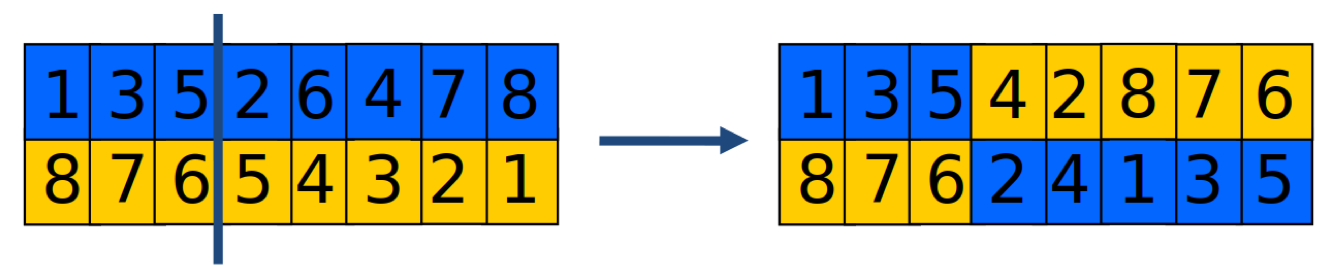

In [ ]:
def recombine(genes1, genes2, prob=1.0):
    p = random.random()
    if p <= prob:
        idx = range(1, len(genes1))
        # your code  
        #
        #
        #
    return child1, child2

How can we reliably unittest a function that relies on random numbers? Write your unittests below. You may use the example above for your unittests.

In [ ]:
# Unittests for the recombine function 




# Parent Selection 

 - pick 5 parents randomly and take best 2 to undergo crossover (see recombination)



In [ ]:
def select_parents(population):
    parents = random.sample(population, 5)
    pass
    # your code 
    #
    #
    # 

In [ ]:
# Unittests for the select_parents function (complete the code below) 

population = [
    [1,3,5,2,6,4,7,8],
    [8,7,6,5,4,3,2,1],
    [1,7,6,5,4,3,2,8],
    [8,3,5,2,6,4,7,1],
    [8,7,6,2,4,1,3,5],
    [1,3,5,4,2,8,7,6]
]

select_parents(population)


# Survivor Selection 

 - when inserting a new child into the population, choose an existing member to replace by:
     - sorting the whole population by decreasing fitness
     - enumerating this list from high to low
     - replacing the first with a fitness worse than the given child

In [ ]:
def replace_parent(population, child):
    # your code
    #
    #
    return population

def select_survivors(population, children):
    # your code 
    #
    #
    return population

In [ ]:
# Unittests for select_survivors function 

population = [
    [1,3,5,2,6,4,7,8], # 5
    [8,7,6,5,4,3,2,1], # 28
    [1,7,6,5,4,3,2,8], # 16 -- this one should be replaced
    [8,3,5,2,6,4,7,1], # 3
    [8,7,6,2,4,1,3,5], # 6
    [1,3,5,4,2,8,7,6], # 8
]

child =  [7,1,6,5,4,3,2,8] # with fitness 11  

assert select_survivors(population, [child]) == [
 [8,3,5,2,6,4,7,1],
 [1,3,5,2,6,4,7,8],
 [8,7,6,2,4,1,3,5],
 [1,3,5,4,2,8,7,6],
 [7,1,6,5,4,3,2,8],
 [8,7,6,5,4,3,2,1]
]


# Population Initialization 

Initialize randomly a population (of board configurations represented by permutations) of size 100. 

In [ ]:
def initialize_population(n=100):
    genes = list(range(8))
    population = []
    for _ in range(n):
        random.shuffle(genes)
        population.append(genes.copy())
    return population

# The n-Queens Problem: Summary 

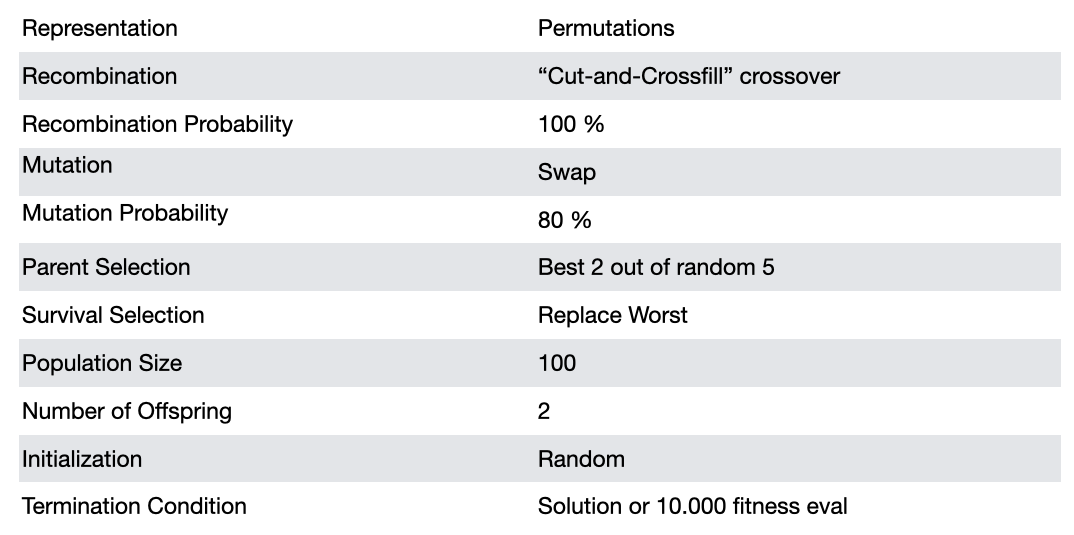

# EA Schema 

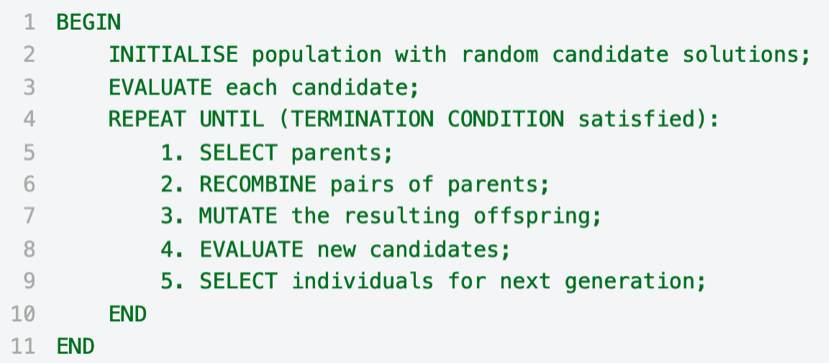

In [ ]:
def evaluate(population):
    pass
    # your code 
    #
    #
    #


def solve_n_queens(pop_size=100, mut_prob=0.8, recomb_prob=1.0, generations=1000):
    population = initialize_population(n=pop_size)  
    p = evaluate(population)
    if p: return p 
    for _ in range(generations):
        pass
        # your code 
        #
        #
        #
        #

In [ ]:
genes = solve_n_queens()
board = Board(genes)
print(f'Genotype: {genes}')
print(f'Phenotype:\n{board}')

# Scalability? 

1. Does your algorithm scale with problem size (bigger board sizes)? Change the code to take bigger board sizes into account. 
2. How can we speed up our implementation (if it is too slow for bigger board sizes)? 